# Logarithms & Exponentials


In [1]:
import math

for n in range(0,20):
    print(n, 2**n)
    

0 1
1 2
2 4
3 8
4 16
5 32
6 64
7 128
8 256
9 512
10 1024
11 2048
12 4096
13 8192
14 16384
15 32768
16 65536
17 131072
18 262144
19 524288


Values of x:  [0.1   0.101 0.102 ... 7.997 7.998 7.999]
Values of y:  [-3.32192809 -3.3075728  -3.29335894 ...  2.99945889  2.99963928
  2.99981965]


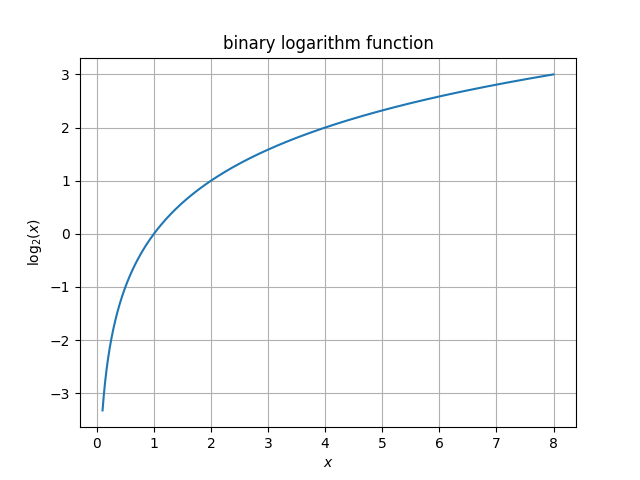

In [2]:
# adapted from https://www.askpython.com/python/examples/plot-mathematical-functions

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.1, 8, 0.001)
y = np.log2(x)
print('Values of x: ', x)
print('Values of y: ', y)
 
plt.plot(x, y)
 
plt.grid(True)
plt.title("binary logarithm function")
plt.xlabel(r"$x$")
plt.ylabel(r"$\log_2(x)$")
plt.show()

Values of x:  [-3.    -2.999 -2.998 ...  2.997  2.998  2.999]
Values of y:  [0.125      0.12508667 0.12517341 ... 7.98338175 7.98891733 7.99445674]


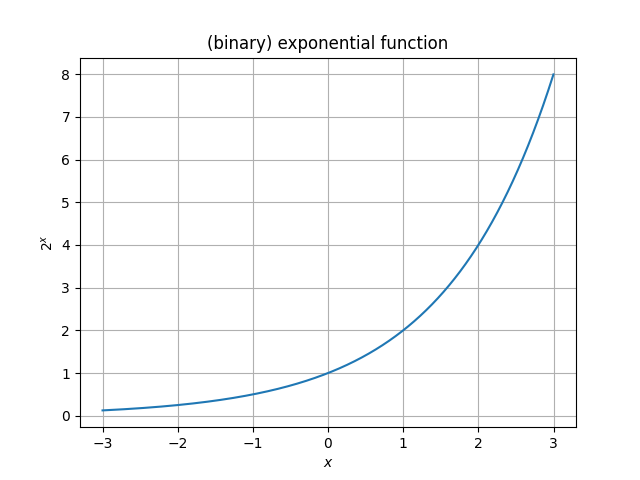

In [3]:
# adapted from https://www.askpython.com/python/examples/plot-mathematical-functions

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
y = 2**x
print('Values of x: ', x)
print('Values of y: ', y)
 
plt.plot(x, y)
 
plt.grid(True)
plt.title("(binary) exponential function")
plt.xlabel(r"$x$")
plt.ylabel(r"$2^x$")
plt.show()

# Probability Distributions

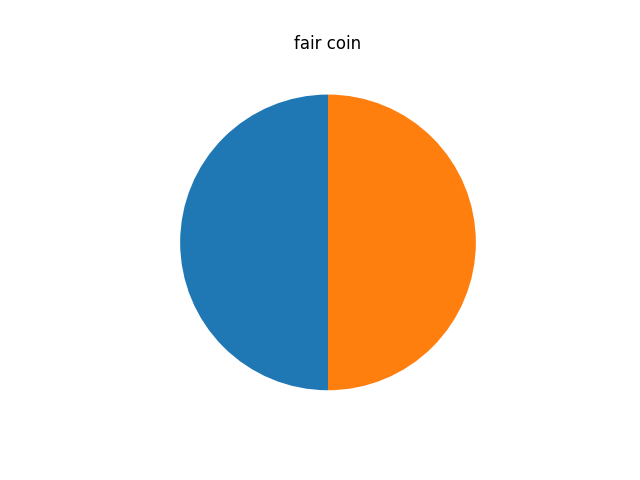

In [4]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([0.5, 0.5])

plt.pie(y, startangle = 90)
plt.title("fair coin")
plt.savefig("fair", transparent=True)
plt.show() 

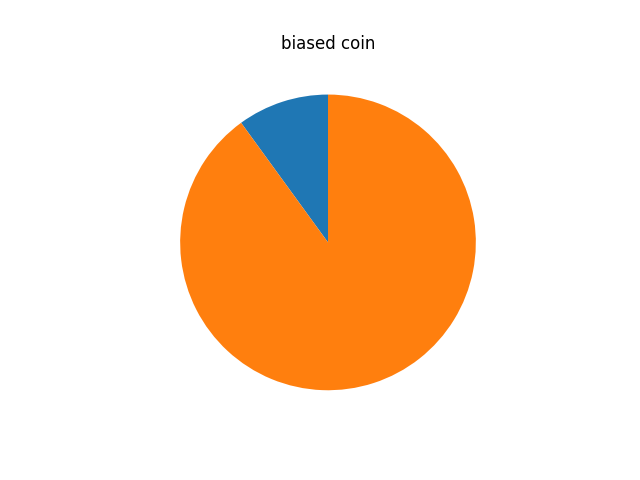

In [5]:
y = np.array([0.1, 0.9])
plt.pie(y, startangle = 90)
plt.title("biased coin")
plt.savefig("biased", transparent=True)
plt.show() 

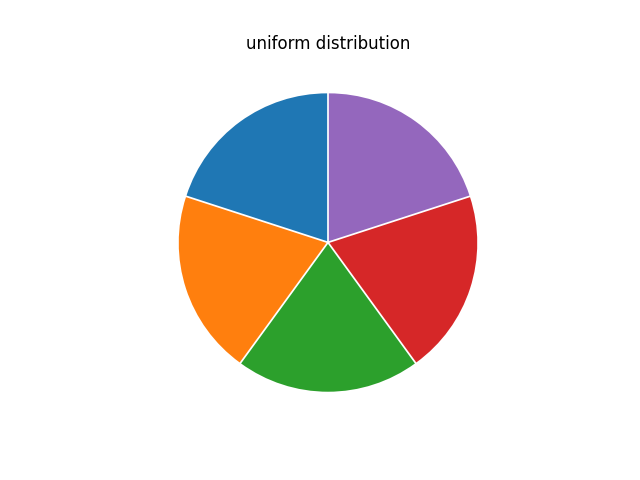

In [6]:
y = np.array([1/5, 1/5, 1/5, 1/5, 1/5])
myexplode = [0.01, 0.01, 0.01, 0.01, 0.01]
plt.pie(y, startangle = 90, explode = myexplode)
plt.title("uniform distribution")
plt.savefig("unif", transparent=True)
plt.show() 


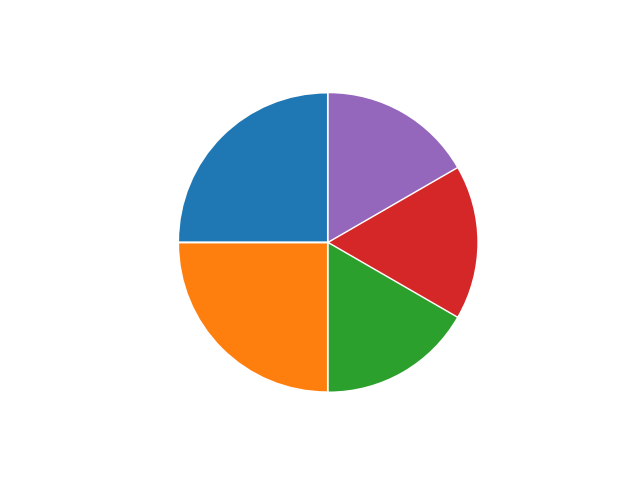

In [7]:
y = np.array([1/4, 1/4, 1/6, 1/6, 1/6])
myexplode = [0.01, 0.01, 0.01, 0.01, 0.01]
plt.pie(y, startangle = 90, explode = myexplode)
plt.savefig("process_example", transparent=True)
plt.show() 
# TODO: adjust colors to the ones used on the slide

In [1]:
!pip install ipywidgets
from ipywidgets import interactive


In [5]:
# from https://www.geeksforgeeks.org/python-binomial-distribution/
from scipy.stats import binom
from matplotlib import pyplot as plt

def plot_binomial(n=6, p=0.5):
    """Plot the probability mass of a binomial distribution"""

    # defining list of r values
    k_values = list(range(n + 1))
    # list of pmf values
    dist = [binom.pmf(k, n, p) for k in k_values ]
    # plotting the graph 
    plt.bar(k_values, dist)
    plt.xlabel(r"$k$")
    plt.ylabel(r"$\binom{n}{k} p^k (1-p)^{n-k}$")
    plt.title("binomial distribution")
    plt.show()

In [6]:
w=interactive(plot_binomial,n=(0,20),p=(0.0,1.0))
w

interactive(children=(IntSlider(value=6, description='n', max=20), FloatSlider(value=0.5, description='p', max…

In [7]:
def plot_binomial_pie(n=6, p=0.5):
    """Plot the probability mass of a binomial distribution"""

    # defining list of r values
    k_values = list(range(n + 1))
    # list of pmf values
    dist = [binom.pmf(k, n, p) for k in k_values ]
    # plotting the graph 
    plt.pie(dist, labels = k_values, startangle = 90)
    plt.title("binomial distribution")    
    plt.show()

In [8]:
w=interactive(plot_binomial_pie,n=(0,20),p=(0.0,1.0))
w

interactive(children=(IntSlider(value=6, description='n', max=20), FloatSlider(value=0.5, description='p', max…

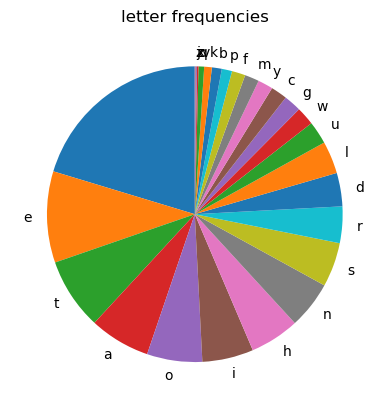

In [38]:
from collections import Counter
import math
import string
import re

## Alice's Adventures in Wonderland: https://www.gutenberg.org/files/11/11-0.txt

## parse input file, convert to lowercase, remove punctuation
with open("Alice_eng.txt",encoding="utf-8") as f:
    Alice_data = f.read().lower()
    Alice_data = re.sub(r'([^a-z\s])+', ' ', Alice_data)  # strip everything but the letters
    Alice_data = re.sub(r'\n+', ' ', Alice_data)  # replace new lines with space
    Alice_data = re.sub(r'\s+', ' ', Alice_data)  # replace multiple spaces with a single space
    Alice_data = Alice_data[:100000]
    
with open("Alice_stripped.txt", 'w') as f:
    f.write(Alice_data)
    
count = Counter(Alice_data)
total_count = sum(count.values())

letters, letter_freq = zip(*count.most_common())
letter_dist = [x/total_count for x in letter_freq]

plt.pie(letter_freq, labels = letters, startangle = 90)
plt.title("letter frequencies")
plt.savefig("letterfreq", transparent=True)
plt.show()


# Sampling from Probability Distributions

In [39]:
from random import random
random()

0.7842071450302609

In [40]:
if random() <= 0.5:
    print(0)
else:
    print(1)

0


In [41]:
import numpy as np
from numpy.random import default_rng

def sample(labels, prob_dist):
    '''
    :param labels: a list of labels for the distribution
    :param prob_dist: a list of non-negative floats that sum to 1
                      must have the same length as labels
    :return: samples a label according to prob_dist
    '''
    assert(all(p>=0 for p in prob_dist))
    assert(np.isclose(sum(prob_dist),1))
    assert(len(labels)==len(prob_dist))

    rng = default_rng()
    return rng.choice(labels, p=prob_dist)


In [42]:
def my_sample(labels, prob_dist):
    '''
    :param labels: a list of labels for the distribution
    :param prob_dist: a list of non-negative floats that sum to 1
                      must have the same length as labels
    :return: samples a label according to prob_dist
    '''
    assert(all(p>=0 for p in prob_dist))
    assert(np.isclose(sum(prob_dist),1))
    assert(len(labels)==len(prob_dist))

    rng = default_rng()
    random_value = rng.random()  # a random float in the interval [0,1)
    
    p_mass = prob_dist[0]
    i = 0
    while p_mass < random_value:
        i += 1
        p_mass += prob_dist[i]
        
    return labels[i]

In [43]:
[sample([1, 2, 3, 4], [0.7, 0.1, 0.1, 0.1]) for i in range(20)]

[np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(4),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2)]

In [44]:
from random import random

def my_sample(labels, prob_dist):

    # a random float in the interval [0,1)
    random_value = random()  
    
    p_mass = prob_dist[0]
    i = 0
    while p_mass < random_value:
        i += 1
        p_mass += prob_dist[i]
        
    return labels[i]

In [45]:
samples = ''
for i in range(60):
    samples += my_sample(['a', 'b', 'c', 'd', 'e', 'f'], 
                         [0.27, 0.23, 0.165, 0.165, 0.09,0.08])
samples

'bbdecfcdeabccbfbabcbbadacedcaceddcbdfafdacbbffcfcafdcbbcbdfd'

In [46]:
import matplotlib.pyplot as plt

def horizontal_bars(prob_dist, labels=False):
    # adapted from https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html
    if labels:
        assert(len(prob_dist)==len(labels))
    
    data = np.array(prob_dist)
    data_cum = data.cumsum()

    fig, ax = plt.subplots(figsize=(6,2.5))
    # squeeze a bit from the bottom to make the bar of reasonable hight
    fig.subplots_adjust(bottom=0.6)  
    
    ax.set_xlim(0, np.sum(data).max())
    ax.set_ylim(-0.5, 0.5)
    ax.yaxis.set_visible(False)
    ax.margins(x=0.2)

    for i in range(len(data)):
        widths = data[i]
        starts = data_cum[i] - widths
        if labels:
            rects = ax.barh(0, widths, left=starts, height=0.8, label=labels[i])
        else:
            rects = ax.barh(0, widths, left=starts, height=0.8, label=i)
        ax.bar_label(rects, label_type='center', color='white')

    if labels:
        ax.legend(ncol=len(data), bbox_to_anchor=(0, 1),
                   loc='lower left', fontsize='small')

    plt.savefig("interval", transparent=True)
    plt.show()


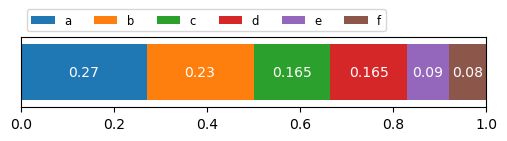

In [47]:
horizontal_bars([0.27, 0.23, 0.165, 0.165, 0.09,0.08], ['a','b','c','d','e','f'])

In [48]:
!pip install seaborn 

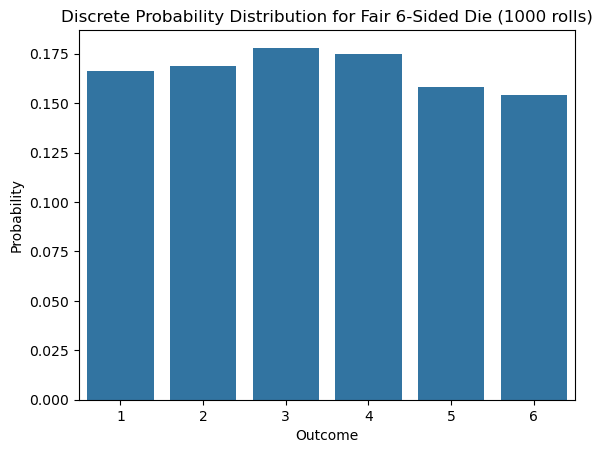

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NUM_ROLLS = 1000

plt.close()
plt.gcf().subplots_adjust()  

values = [1, 2, 3, 4, 5, 6]
sample = np.random.choice(values, NUM_ROLLS)

# Numpy arrays containing counts for each side
side, count = np.unique(sample, return_counts=True)
probs = count / len(sample)

# Plot the results
sns.barplot(x=side, y=probs)
plt.title(
    f"Discrete Probability Distribution for Fair 6-Sided Die ({NUM_ROLLS} rolls)")
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.show()

# Surprisal and Entropy

C:\Users\Normando\AppData\Local\Temp\ipykernel_19840\1434730445.py:8: RuntimeWarning: divide by zero encountered in log2
  y = -x*np.log2(x) - (1-x)*np.log2(1-x)
C:\Users\Normando\AppData\Local\Temp\ipykernel_19840\1434730445.py:8: RuntimeWarning: invalid value encountered in multiply
  y = -x*np.log2(x) - (1-x)*np.log2(1-x)


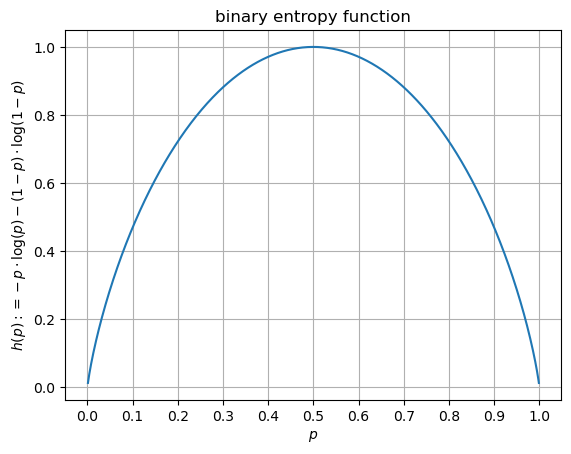

In [50]:
import numpy as np
import matplotlib.pyplot as plt

plt.close()
plt.gcf().subplots_adjust()  

x = np.arange(0, 1, 0.001)
y = -x*np.log2(x) - (1-x)*np.log2(1-x)
plt.plot(x, y)
 
plt.grid(True)
plt.xticks([i/10.0 for i in range(0,11)])
plt.title("binary entropy function")
plt.xlabel(r"$p$")
plt.ylabel(r"$h(p) := -p \cdot \log(p) -(1-p) \cdot \log(1-p)$")
plt.savefig("binaryentropy", transparent=True)
plt.show()

In [51]:
def entropy(prob_dist):
    '''
    :param prob_dist: a list of non-negative floats that sum to 1
    :return: (base 2) Shannon entropy of prob_dist
    '''
    assert(all(p>=0 for p in prob_dist))
    assert(np.isclose(sum(prob_dist),1))

    # https://en.wikipedia.org/wiki/Entropy_%28information_theory%29
    # Shannon entropy H(p_i) = - sum_i p_i * log2(p_i)
    ent = 0.0
    for p in prob_dist:
        ent -= p * np.log2(p)

    return ent
    

In [52]:
def plot_binomial_pie(n=6, p=0.5):
    """Plot the probability mass of a binomial distribution"""

    # defining list of r values
    k_values = list(range(n + 1))
    # list of pmf values
    dist = [binom.pmf(k, n, p) for k in k_values ]
    # plotting the graph 
    plt.pie(dist, labels = k_values, startangle = 90)
    
    # computing the Shannon entropy
    ent = entropy(dist)
    plt.title("binomial distribution with entropy H={:.3f}".format(ent))    
    plt.show()

In [53]:
w=interactive(plot_binomial_pie,n=(0,20),p=(0.0,1.0))
w

interactive(children=(IntSlider(value=6, description='n', max=20), FloatSlider(value=0.5, description='p', max…

In [54]:
def plot_uniform_pie(n=6):
    """Plot the probability mass of a uniform distribution"""

    dist = [1/n for i in range(n)]
    # plotting the graph 
    plt.pie(dist, startangle = 90)
    
    # computing the Shannon entropy
    ent = entropy(dist)
    plt.title(r"$H(unif)=\log_2({})={:.3f}$".format(n,ent))  
    plt.show()

In [55]:
w=interactive(plot_uniform_pie,n=(0,32))
w

interactive(children=(IntSlider(value=6, description='n', max=32), Output()), _dom_classes=('widget-interact',…

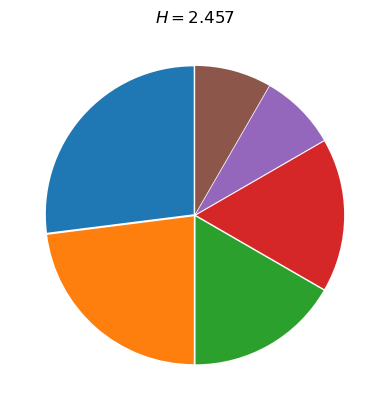

In [56]:
y = np.array([0.27, 0.23, 1/6, 1/6, 1/12,1/12])
myexplode = [0.01 for i in range(len(y))]
plt.pie(y, startangle = 90, explode = myexplode)
ent = entropy(y)
plt.title(r"$H={:.3f}$".format(ent))
plt.savefig("example1", transparent=True)
plt.show() 
# TODO: adjust colors to the ones used on the slide

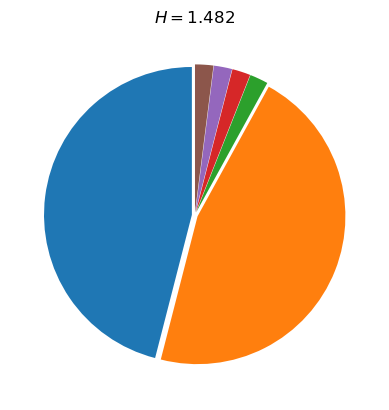

In [57]:
y = np.array([0.46, 0.46, 0.02, 0.02, 0.02,0.02])
myexplode = [0.02 for i in range(len(y))]
plt.pie(y, startangle = 90, explode = myexplode)
ent = entropy(y)
plt.title(r"$H={:.3f}$".format(ent))
plt.savefig("example1", transparent=True)
plt.show() 
# TODO: adjust colors to the ones used on the slide

# Huffman coding

code from https://favtutor.com/blogs/huffman-coding and https://www.programiz.com/dsa/huffman-coding

In [58]:
from collections import Counter


class NodeTree(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return self.left, self.right

    def __str__(self):
        return self.left, self.right


def huffman_code_tree(node, binString=''):
    '''
    Function to find Huffman Code
    '''
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, binString + '0'))
    d.update(huffman_code_tree(r, binString + '1'))
    return d


def make_tree(nodes):
    '''
    Function to make tree
    :param nodes: Nodes
    :return: Root of the tree
    '''
    while len(nodes) > 1:
        (key1, c1) = nodes[-1]
        (key2, c2) = nodes[-2]
        nodes = nodes[:-2]
        node = NodeTree(key1, key2)
        nodes.append((node, c1 + c2))
        nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    return nodes[0][0]

In [59]:
def huffman(input):
    count = Counter(input)
    # freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
    node = make_tree(list(count.most_common()))
    encoding = huffman_code_tree(node)

    # compute Shannon entropy of frequency distribution for comparison
    total_count = sum(count.values())
    letters, freq = zip(*count.most_common())
    freq = [x / total_count for x in freq]
    ent = entropy(freq)

    return encoding, "".join([encoding[a] for a in input]), ent


In [60]:
input = 'BCAADDDCCACACAC'
len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input)

(120, 28, np.float64(26.72905595320056))

In [61]:
input = Alice_data
len(input), len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input), huffman(input)[2]

(100000,
 800000,
 407804,
 np.float64(404175.25875771494),
 np.float64(4.041752587577149))

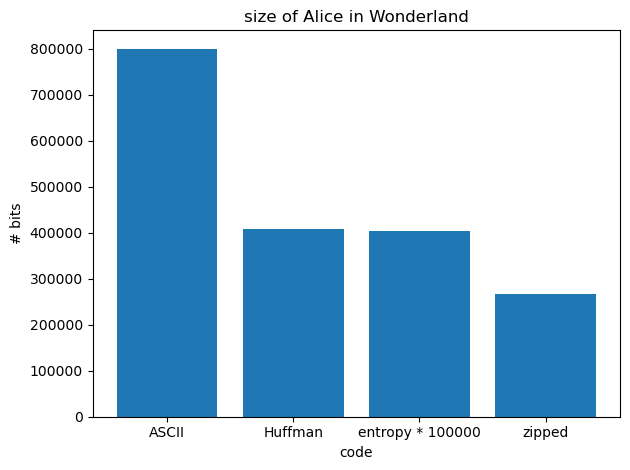

In [62]:
import numpy as np
import matplotlib.pyplot as plt

input = Alice_data
len(input), len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input), huffman(input)[2]

x = ['ASCII', 'Huffman', 'entropy * 100000', 'zipped']
coding = [len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input), 33341*8]

x_pos = [i for i, _ in enumerate(x)]

plt.close()
plt.gcf().subplots_adjust()  

plt.bar(x_pos, coding)
plt.xticks(x_pos, x)
plt.xlabel("code")
plt.ylabel("# bits")
plt.title("size of Alice in Wonderland")
plt.tight_layout()
plt.savefig("Alice_numbers", transparent=True)

plt.show()

In [63]:
letter_samples = "".join(np.random.choice(letters, size=100000, p=letter_dist))
input = letter_samples
print(len(input), len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input), huffman(input)[2])

with open("letter_samples.txt", 'w') as f:
    f.write(letter_samples)

100000 800000 408005 404368.3819694357 4.043683819694357


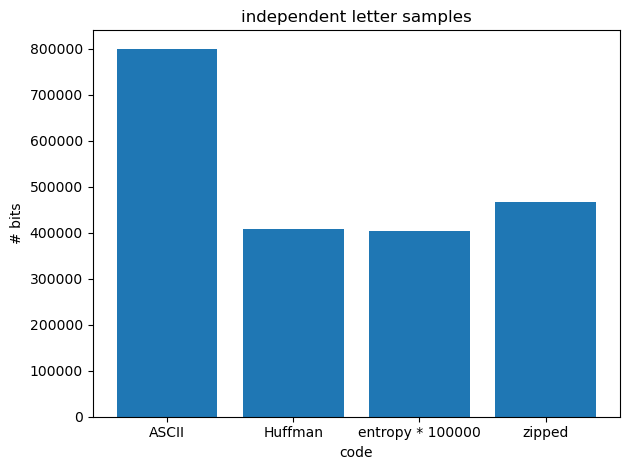

In [64]:
input = letter_samples
len(input), len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input), huffman(input)[2]

x = ['ASCII', 'Huffman', 'entropy * 100000', 'zipped']
coding = [len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input), 58471*8]

x_pos = [i for i, _ in enumerate(x)]

plt.close()
plt.gcf().subplots_adjust()  

plt.bar(x_pos, coding)
plt.xticks(x_pos, x)
plt.xlabel("code")
plt.ylabel("# bits")
plt.title("independent letter samples")
plt.tight_layout()
plt.savefig("letter_samples_numbers", transparent=True)

plt.show()

# Counting bigrams

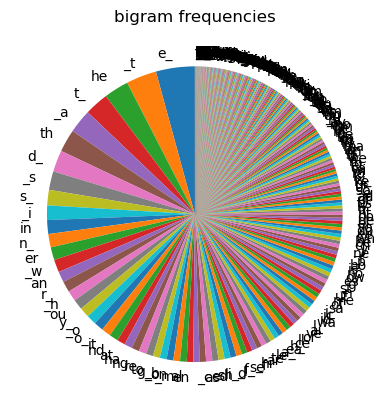

In [65]:
# from https://www.codespeedy.com/compute-bigrams-frequency-in-a-string-in-python/
bigram_count = Counter(Alice_data[i:i+2] for i in range(len(Alice_data)-1))
total_count = sum(bigram_count.values())

bigrams, bigram_freq = zip(*bigram_count.most_common())
bigram_dist = [x / total_count for x in bigram_freq]

bigram_labels = tuple(bigram.replace(' ', '_') for bigram in bigrams)   # to increase readability
plt.pie(bigram_freq, labels=bigram_labels, startangle=90)
plt.title("bigram frequencies")
plt.savefig("bigramfreq", transparent=True)
plt.show()

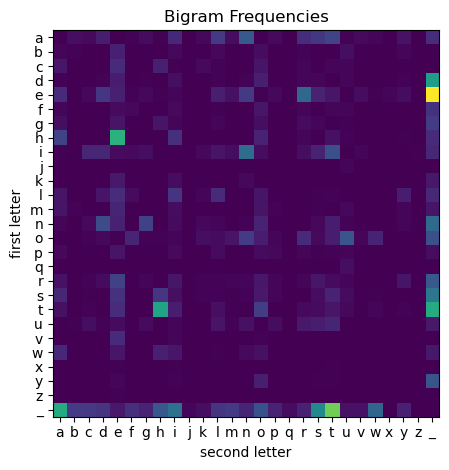

In [66]:
first_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']
second_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']

bigram_data = np.zeros( (len(first_letters),len(second_letters)), dtype=float)
col = 0
for fl in first_letters:
    row = 0
    for sl in second_letters:
        bigram_data[col, row] = bigram_count[fl+sl] / total_count
        row += 1
    col += 1

fig, ax = plt.subplots()
im = ax.imshow(bigram_data)

letter_labels = [x.replace(' ', '_') for x in first_letters]

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(first_letters)), labels=letter_labels)
ax.set_yticks(np.arange(len(second_letters)), labels=letter_labels)

plt.ylabel("first letter")
plt.xlabel("second letter")
ax.set_title("Bigram Frequencies")
fig.tight_layout()
plt.savefig("bigramfreq2", transparent=True)
plt.show()

# TODO: make different-sized squares instead, like in 
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec